In [36]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

In [7]:
iris_data = load_iris()

In [128]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
X['label'] = iris_data.target

In [129]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [132]:
sc = StandardScaler()
sc.fit(iris_data.data)
X_scaled = sc.fit_transform(X)

In [133]:
print(X_scaled.shape)

(150, 5)


In [134]:
pca = PCA(n_components=2) # n_components : 사용할 feature의 개수
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (150, 5)
축소된 데이터 형태: (150, 2)


In [135]:
print('PCA 주성분 형태 : ', pca.components_.shape)
print('PCA 주성분 :', pca.components_)

PCA 주성분 형태 :  (2, 5)
PCA 주성분 : [[ 0.44486332 -0.23336907  0.50604293  0.49689383  0.49462368]
 [ 0.38197963  0.92097203  0.02871731  0.07063728 -0.00936826]]


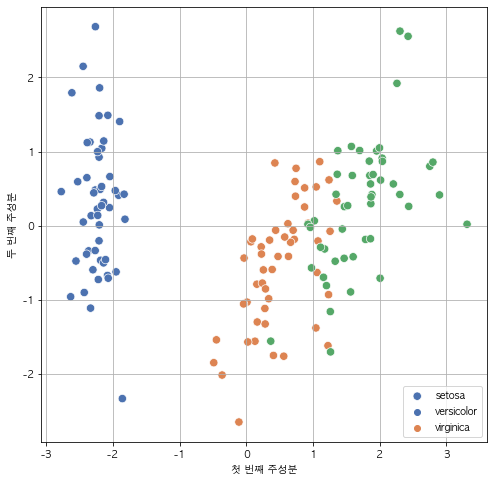

In [125]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=iris_data.target, palette='deep',
                data=X_pca, s=70)
plt.legend(iris_data.target_names)
# plt.gca().set_aspect("equal") # 축 스케일링의 가로 세로 비율을 설정합니다
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.grid()
plt.show()

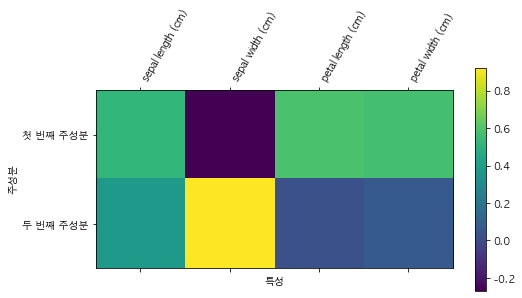

In [127]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(iris_data.feature_names)), iris_data.feature_names, rotation=60, ha='left')
# ha = horizontalalignment (수평 정렬을 다음 중 하나로 설정합니다. center, right, left)
plt.xlabel('특성')
plt.ylabel('주성분')
plt.show()

In [150]:
X_pca[1, 0]

-2.4153224919425993

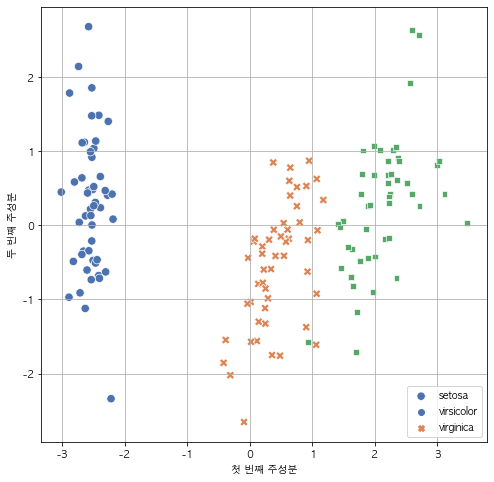

In [171]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=iris_data.target, style=iris_data.target,
                palette='deep', data=X_pca, s=70)
plt.legend(['setosa', 'virsicolor', 'virginica'])
# plt.gca().set_aspect("equal") # 축 스케일링의 가로 세로 비율을 설정합니다
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.grid()
plt.show()

In [163]:
print(iris_data.target)
print(iris_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [167]:
print(X_pca.shape)
print(iris_data.target.shape)
print(iris_data.target_names.shape)

(150, 2)
(150,)
(3,)
